In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
col_names=['RAM', 'SEC', 'ABHISHEK', 'RAT', 'TUT', 'HYU', 'ION', 'LOL', 'UYR', 'KYU', 'RED', 'EDG', 'INF', 'PRICE']
df = pd.read_csv('housing.csv', header=None, sep='\s+', names=col_names)

In [ ]:
df.head(10)

,RAM,SEC,ABHISHEK,RAT,TUT,HYU,ION,LOL,UYR,KYU,RED,EDG,INF,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [ ]:
df.describe()

,RAM,SEC,ABHISHEK,RAT,TUT,HYU,ION,LOL,UYR,KYU,RED,EDG,INF,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RAM       506 non-null    float64
 1   SEC       506 non-null    float64
 2   ABHISHEK  506 non-null    float64
 3   RAT       506 non-null    int64  
 4   TUT       506 non-null    float64
 5   HYU       506 non-null    float64
 6   ION       506 non-null    float64
 7   LOL       506 non-null    float64
 8   UYR       506 non-null    int64  
 9   KYU       506 non-null    float64
 10  RED       506 non-null    float64
 11  EDG       506 non-null    float64
 12  INF       506 non-null    float64
 13  PRICE     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

RAM         0
SEC         0
ABHISHEK    0
RAT         0
TUT         0
HYU         0
ION         0
LOL         0
UYR         0
KYU         0
RED         0
EDG         0
INF         0
PRICE       0
dtype: int64

<Axes: >

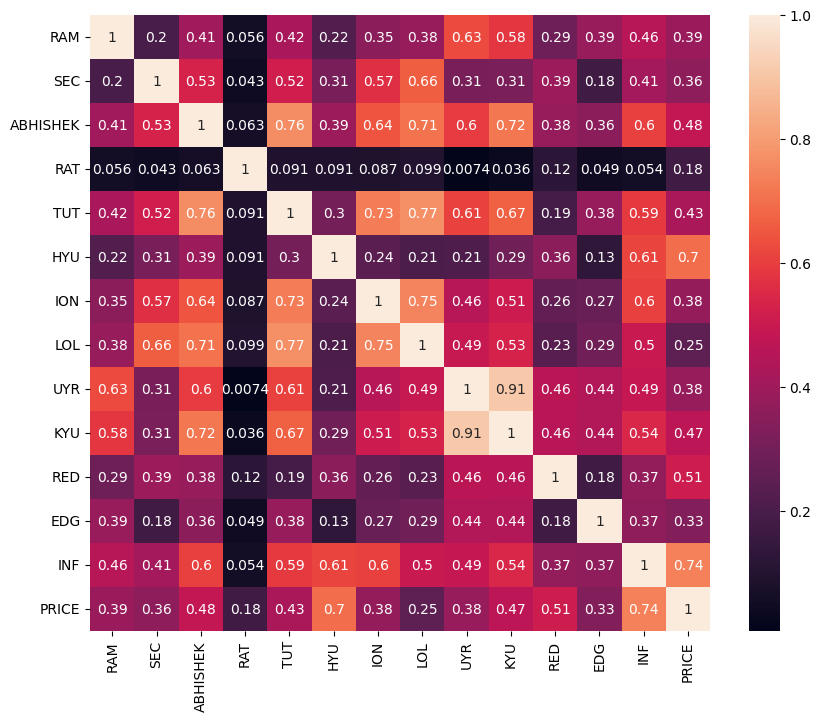

In [ ]:
c=df.corr().abs()
f=plt.figure(figsize=(10, 8))
sns.heatmap(c,annot=True)

In [ ]:
x=df.drop('PRICE', axis=1)
y=df['PRICE']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape=(13,), name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(32, activation='relu', name='dense_3'))
model.add(Dense(1, activation='relu', name='dense_output'))

model.compile(loss='mse', optimizer='adam', metrics='mae')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_output (Dense)        (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
kuchbhi=model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 264.6886 - mae: 11.8486 - val_loss: 157.2936 - val_mae: 10.5791
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 88.5056 - mae: 7.2205 - val_loss: 83.5454 - val_mae: 6.3204
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 88.7006 - mae: 7.1408 - val_loss: 94.3958 - val_mae: 7.1162
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 86.4211 - mae: 6.7655 - val_loss: 93.5525 - val_mae: 7.4645
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 81.8922 - mae: 6.7600 - val_loss: 79.7342 - val_mae: 6.4133
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 78.9899 - mae: 6.7573 - val_loss: 74.6528 - val_mae: 5.9505
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 70.6348 - mae: 6.0966 - val_loss: 63.2478 - val_mae: 5.6492
Epoch 8/100
10/10 [==============================] - 0s 8ms/step

In [ ]:
mse_nn, mae_nn = model.evaluate(x_test, y_test)
print(f'Mean squared Error: {mse_nn}\n Mean absolute Error: {mae_nn}')

4/4 [==============================] - 0s 9ms/step - loss: 21.3011 - mae: 3.6626
Mean squared Error: 21.301076889038086
 Mean absolute Error: 3.662588119506836


In [ ]:
new_input = np.array([[0.00782,	20.0,	6.31,	0,	0.678,	5.575,	75.2,	7.0900,	2, 496.0,	17.3,	496.90,	8.98]])
predictions = model.predict(new_input)
print(predictions)

1/1 [==============================] - 0s 77ms/step
[[35.527576]]


Text(0.5, 1.0, 'Loss evolution')

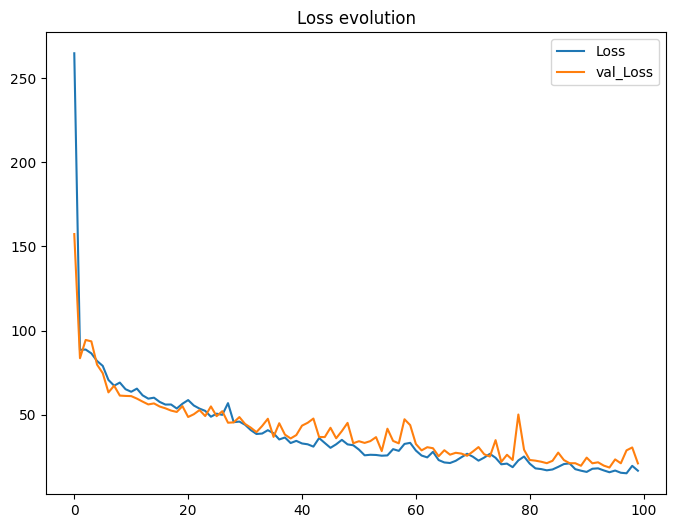

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(kuchbhi.history['loss'], label='Loss')
plt.plot(kuchbhi.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

Text(0.5, 1.0, 'mae evolution')

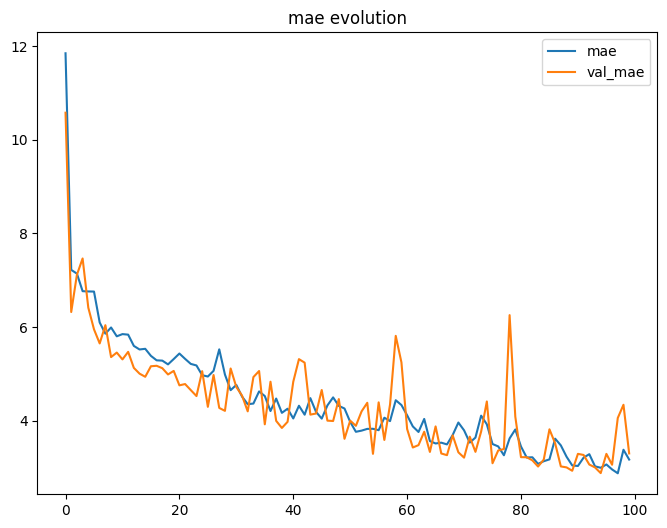

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(kuchbhi.history['mae'], label='mae')
plt.plot(kuchbhi.history['val_mae'], label='val_mae')
plt.legend()
plt.title('mae evolution')